### ccp_alpha: 가지치기 양을 조절하는 옵션
- 값이 커지면 가지치기하는 노드수가 증가
- 값이 작아지면 가지치기하는 노드수가 감소

In [1]:
import pandas as pd
df = pd.read_csv('c:/data/customer/customer.csv')
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,32,163.8,80,27.85,177.8,123,15.11,190.4,106,8.57,8.1,5,2.19,0,0
1,0,1,36,106.7,76,18.14,209.8,77,17.83,190.4,117,8.57,12.1,2,3.27,1,0
2,0,1,26,244.9,150,41.63,118.0,138,10.03,236.0,91,10.62,15.2,4,4.10,2,0
3,0,0,0,97.6,98,16.59,105.5,118,8.97,220.2,105,9.91,11.6,9,3.13,1,0
4,0,1,29,121.1,116,20.59,186.4,100,15.84,241.7,75,10.88,10.1,6,2.73,0,0


In [4]:
X = df2[train_cols]
y = df2['Churn']
y.value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [7]:
#가지치기 경로 정보
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00129489, 0.00129997, 0.00131544, 0.00133189,
        0.00137008, 0.00137075, 0.00137298, 0.00138122, 0.00165746,
        0.00184162, 0.00184162, 0.00184162, 0.00184162, 0.00184162,
        0.00185413, 0.00207182, 0.00207182, 0.00210471, 0.00212231,
        0.00213461, 0.00220994, 0.0022851 , 0.00230203, 0.00239411,
        0.00241922, 0.00245306, 0.00248619, 0.0025237 , 0.00254994,
        0.00263089, 0.00286376, 0.00302402, 0.00319478, 0.00335892,
        0.00384859, 0.00411076, 0.00411156, 0.00591141, 0.0068565 ,
        0.00928683, 0.01051489, 0.01392349, 0.01644238, 0.01957123,
        0.02344153, 0.06437665, 0.07668733]),
 'impurities': array([0.        , 0.00258978, 0.00518971, 0.0078206 , 0.01048437,
        0.01322453, 0.01596603, 0.018712  , 0.02009321, 0.02340813,
        0.02524975, 0.02709137, 0.02893299, 0.03077461, 0.03261623,
        0.04374099, 0.04581281, 0.04995646, 0.05206117, 0.0605504 ,
        0.07122343, 0.07343338, 0.07571848

In [8]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) # 값이 크면 제거된 노드수 증가(가지치기 양 조정)
print(impurities) # 노드의 불순도

[0.         0.00129489 0.00129997 0.00131544 0.00133189 0.00137008
 0.00137075 0.00137298 0.00138122 0.00165746 0.00184162 0.00184162
 0.00184162 0.00184162 0.00184162 0.00185413 0.00207182 0.00207182
 0.00210471 0.00212231 0.00213461 0.00220994 0.0022851  0.00230203
 0.00239411 0.00241922 0.00245306 0.00248619 0.0025237  0.00254994
 0.00263089 0.00286376 0.00302402 0.00319478 0.00335892 0.00384859
 0.00411076 0.00411156 0.00591141 0.0068565  0.00928683 0.01051489
 0.01392349 0.01644238 0.01957123 0.02344153 0.06437665 0.07668733]
[0.         0.00258978 0.00518971 0.0078206  0.01048437 0.01322453
 0.01596603 0.018712   0.02009321 0.02340813 0.02524975 0.02709137
 0.02893299 0.03077461 0.03261623 0.04374099 0.04581281 0.04995646
 0.05206117 0.0605504  0.07122343 0.07343338 0.07571848 0.0780205
 0.08280872 0.08522794 0.09013406 0.09510643 0.10267754 0.10522748
 0.10785836 0.11358589 0.11660992 0.12299948 0.13643518 0.14028377
 0.14439453 0.1567292  0.16264061 0.1694971  0.17878393 0.1892

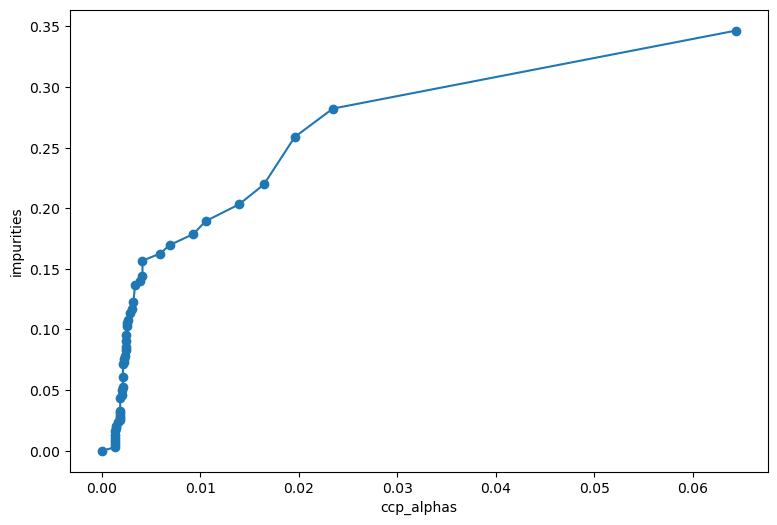

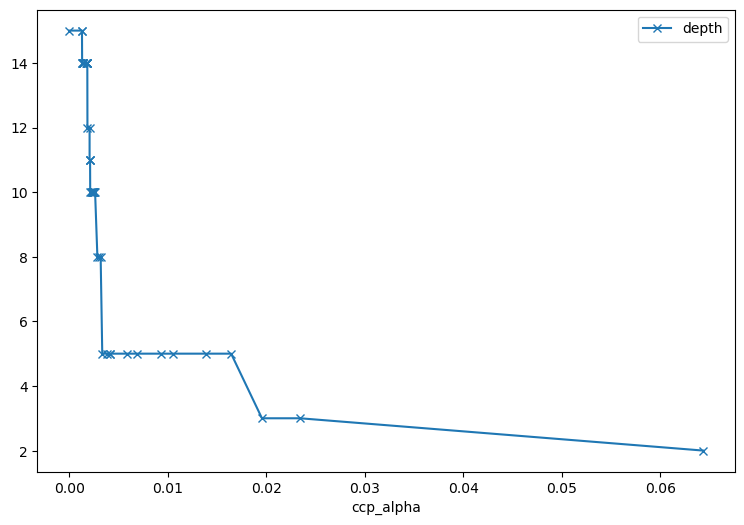

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# 마지막 값(전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값)은 제외하고 출력
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# 마지막 값(전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값)은 제외하고 출력
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel('ccp_alpha')
plt.legend()

최고 정확도: 0.8677685950413223
최적의 alpha: 0.0033589246858478222


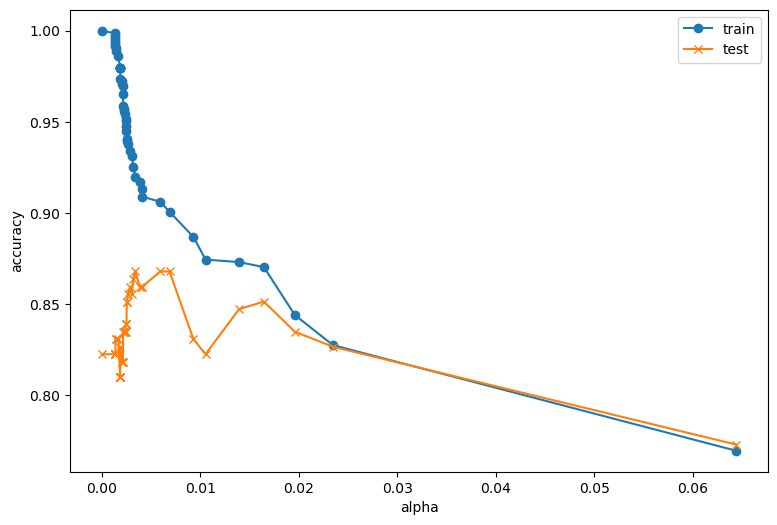

In [10]:
import numpy as np
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
m = max(test_scores)
i = np.argmax(test_scores)
print('최고 정확도:', m)
print('최적의 alpha:', ccp_alphas[i])
plt.figure(figsize=(9,6))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas, train_scores, marker='o', label='train')
plt.plot(ccp_alphas, test_scores, marker='x', label='test')
plt.legend()
# ccp alpha가 증가하면 노드 개수가 감소(가지치기를 많이 함)

In [11]:
#ccp_alpha=0 과적합문제 발생
model1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
model1.fit(X_train, y_train)
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

1.0
0.8223140495867769


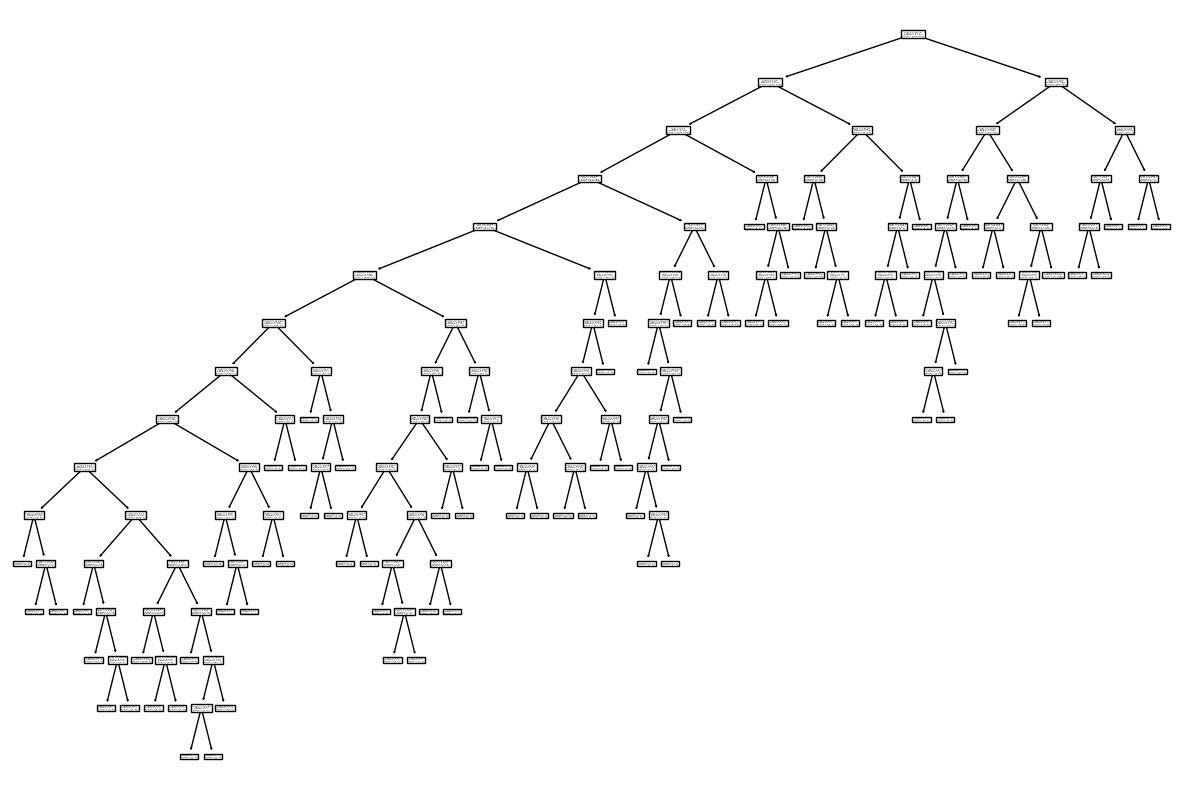

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model1)
plt.show()

In [13]:
#ccp_alpha=최적의 alpha
model2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0033589246858478222)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.919889502762431
0.8677685950413223


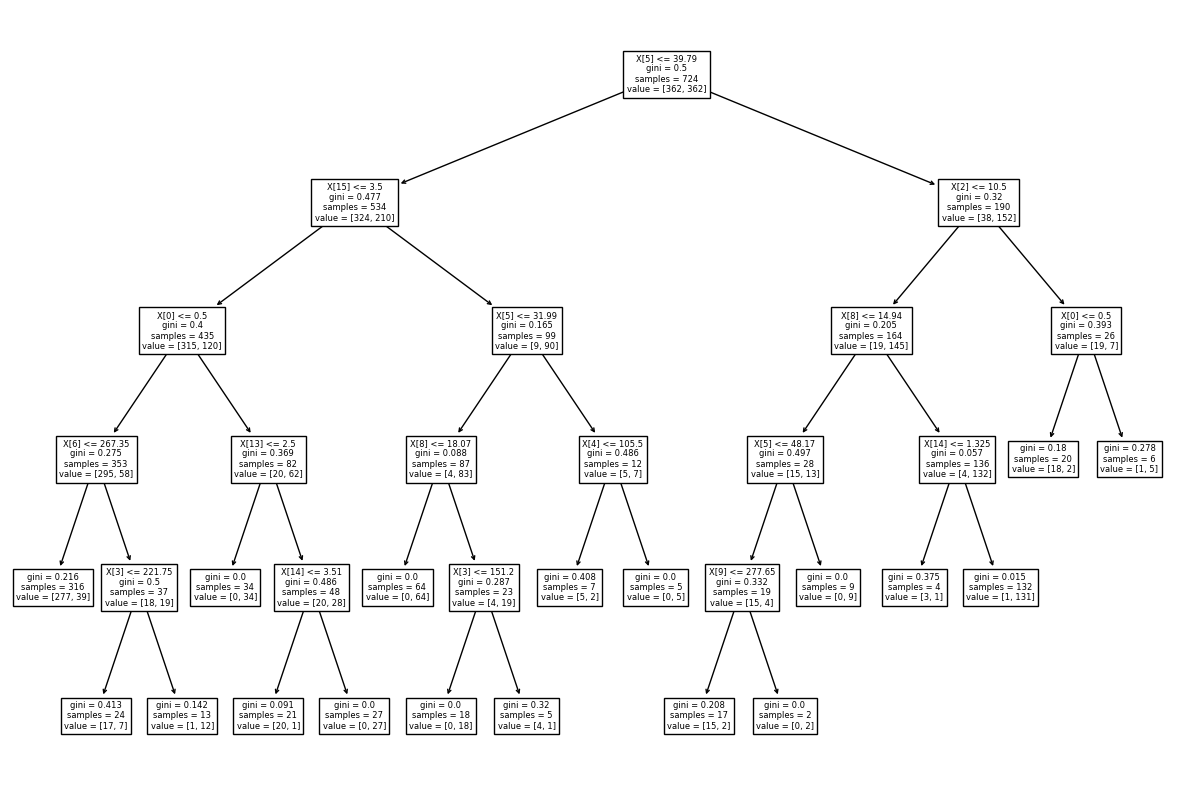

In [14]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model2)
plt.show()

In [15]:
#ccp_alpha=0.02 가지치기를 많이 진행
model3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
model3.fit(X_train, y_train)
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))

0.8439226519337016
0.8347107438016529


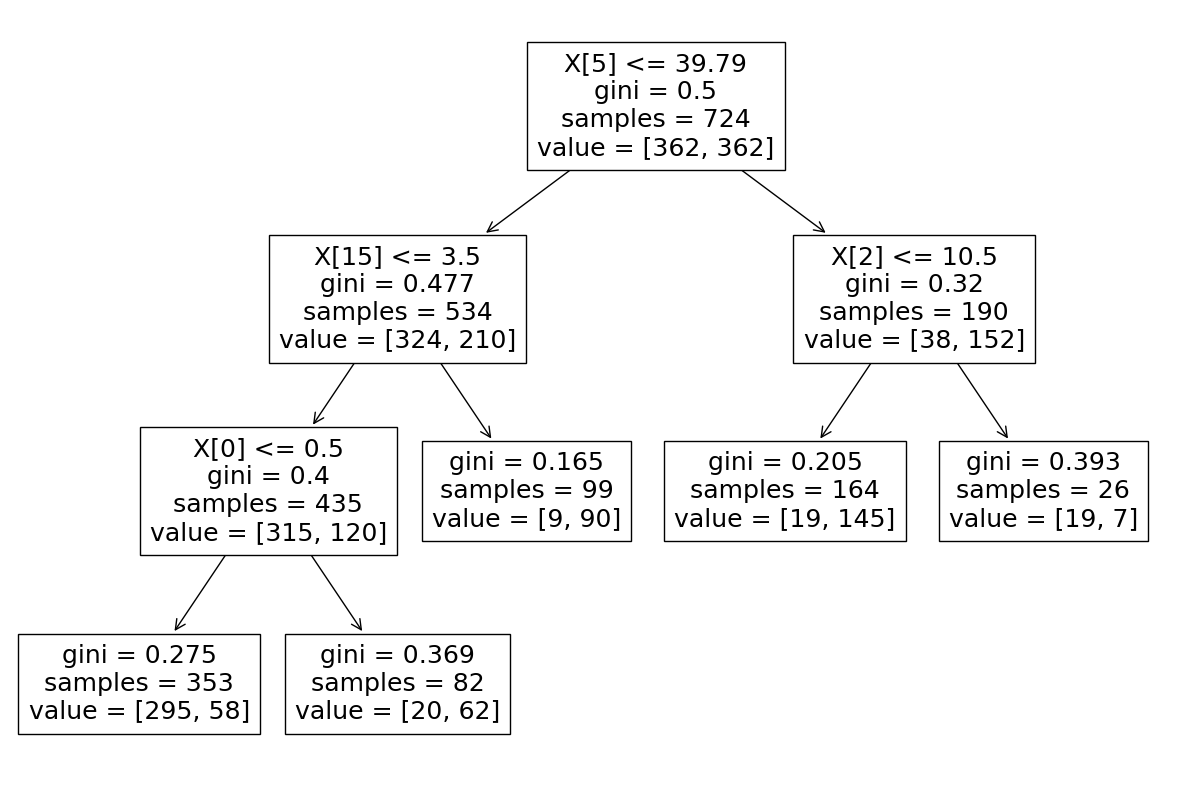

In [16]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model3)
plt.show()